In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

# set up notebook to display multiple output in one cell
from IPython.display import Latex
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)

In [2]:
import scipy.stats as stats

In [3]:
work_dir = "./"

In [4]:
filePaths = [f for f in os.listdir(work_dir) if f.endswith(".txt")]
for i in range(len(filePaths)):
    print(f'{i} - {filePaths[i]}')

0 - NOKubernetesLoadBalancer5Client.txt
1 - K8KubernetesLoadBalancer5Client.txt
2 - LinkerdKubernetesLoadBalancer5Client.txt


# No Load Balancer

In [5]:
file = pd.read_csv(work_dir+filePaths[0], sep=',')

In [6]:
file.head()

iterStep               process      time
0         0  health serialization  0.016498
1         1   order serialization  0.050569
2         2  health serialization  0.053432
3         3   order serialization  0.082338
4         4  health serialization  0.116210

In [7]:
datDF = file.copy()
datDF['iterStep'] = datDF['iterStep'].astype(int)
datDF['process'] = datDF['process'].astype(str)
datDF['time'] = datDF['time'].astype(float)
datDF['test'] = 'baseline'
datDF.head()

iterStep               process      time      test
0         0  health serialization  0.016498  baseline
1         1   order serialization  0.050569  baseline
2         2  health serialization  0.053432  baseline
3         3   order serialization  0.082338  baseline
4         4  health serialization  0.116210  baseline

In [8]:
tmpLST = []
for i in range(len(datDF)):
    if 'health' in datDF['process'][i].lower():
        tmpLST.append("health")
        datDF.at[i,'process'] = datDF['process'][i].lower().replace('health ',"")

    if 'order' in datDF['process'][i].lower():
        tmpLST.append("order")
        datDF.at[i,'process'] = datDF['process'][i].lower().replace('order ',"")
    
datDF['server'] = tmpLST

In [9]:
datDF.head()

iterStep        process      time      test  server
0         0  serialization  0.016498  baseline  health
1         1  serialization  0.050569  baseline   order
2         2  serialization  0.053432  baseline  health
3         3  serialization  0.082338  baseline   order
4         4  serialization  0.116210  baseline  health

In [10]:
serialDF = datDF[datDF['process']=='serialization'].reset_index(drop=True)

# convert seconds to miliseconds
serialDF['time'] = serialDF['time']*1000

serialDF.head()

iterStep        process        time      test  server
0         0  serialization   16.497612  baseline  health
1         1  serialization   50.569296  baseline   order
2         2  serialization   53.431749  baseline  health
3         3  serialization   82.337856  baseline   order
4         4  serialization  116.209984  baseline  health

In [11]:
deserialDF = datDF[datDF['process']=='deserialization'].reset_index(drop=True)
deserialDF.head()

Empty DataFrame
Columns: [iterStep, process, time, test, server]
Index: []

# Latency Data Analysis

For this analysis we will be using a boxplot. A box and whisker plot (otherwise known as a boxplot), is a graph summarising a set of data. The shape of the boxplot shows how the data is distributed and it also shows any outliers. It is a useful way to compare different sets of data as you can draw more than one boxplot per graph. These can be displayed alongside a number line, horizontally or vertically.

# Reading a Box and Whisker Plot

Interpreting a boxplot can be done once you understand what the different lines mean on a box and whisker diagram. The line splitting the box in two represents the median value. This shows that 50% of the data lies on the left hand side of the median value and 50% lies on the right hand side. The left edge of the box represents the lower quartile; it shows the value at which the first 25% of the data falls up to. The right edge of the box shows the upper quartile; it shows that 25% of the data lies to the right of the upper quartile value. The values at which the horizontal lines stop at are the values of the upper and lower values of the data. The single points on the diagram show the outliers.

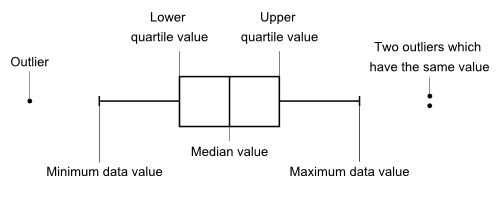

# Serialization

<AxesSubplot:xlabel='time', ylabel='server'>

Text(0.5, 0, 'time (ms)')

Text(0, 0.5, 'Server Latency')

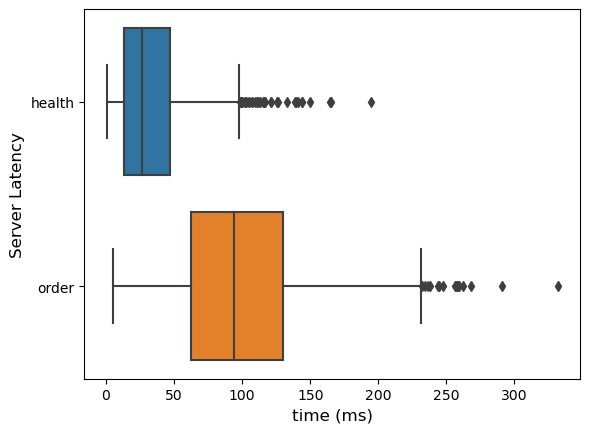

In [12]:
sns.boxplot(data=serialDF, x="time", y="server")
plt.xlabel('time (ms)', fontsize=12)
plt.ylabel('Server Latency', fontsize=12)
plt.show()

## Health Server

In [13]:
tmpHealth = serialDF[serialDF['server']=='health'].reset_index(drop=True)
tmpHealth.head()
print("Median value: {}".format(np.round_(np.median(tmpHealth['time']),3)))
tmpHealth.describe()

iterStep        process        time      test  server
0         0  serialization   16.497612  baseline  health
1         2  serialization   53.431749  baseline  health
2         4  serialization  116.209984  baseline  health
3         6  serialization   43.198824  baseline  health
4         8  serialization   37.658691  baseline  health

Median value: 26.314


iterStep         time
count  1000.000000  1000.000000
mean    999.000000    33.313339
std     577.638872    27.579221
min       0.000000     0.588179
25%     499.500000    12.892365
50%     999.000000    26.314497
75%    1498.500000    47.021925
max    1998.000000   194.416285

## Order Server

In [14]:
tmpOrder = serialDF[serialDF['server']=='order'].reset_index(drop=True)
tmpOrder.head()
print("Median value: {}".format(np.round_(np.median(tmpOrder['time']),3)))
tmpOrder.describe()

iterStep        process        time      test server
0         1  serialization   50.569296  baseline  order
1         3  serialization   82.337856  baseline  order
2         5  serialization   38.655996  baseline  order
3         7  serialization  182.861805  baseline  order
4         9  serialization   26.018143  baseline  order

Median value: 93.736


iterStep         time
count  1000.000000  1000.000000
mean   1000.000000    99.897980
std     577.638872    50.308244
min       1.000000     5.186081
25%     500.500000    62.190711
50%    1000.000000    93.736172
75%    1499.500000   129.974544
max    1999.000000   331.762314

# Kubernetes Load Balancer

In [15]:
file1 = pd.read_csv(work_dir+filePaths[1], sep=',')

In [16]:
file1.head()

iterStep               process      time
0         0  health serialization  0.021383
1         1   order serialization  0.077893
2         2  health serialization  0.008902
3         3   order serialization  0.032287
4         4  health serialization  0.010166

In [17]:
datDF1 = file1.copy()
datDF1['iterStep'] = datDF1['iterStep'].astype(int)
datDF1['process'] = datDF1['process'].astype(str)
datDF1['time'] = datDF1['time'].astype(float)
datDF1['test'] = 'kubernetes'
datDF1.head()

iterStep               process      time        test
0         0  health serialization  0.021383  kubernetes
1         1   order serialization  0.077893  kubernetes
2         2  health serialization  0.008902  kubernetes
3         3   order serialization  0.032287  kubernetes
4         4  health serialization  0.010166  kubernetes

In [18]:
tmpLST = []
for i in range(len(datDF1)):
    if 'health' in datDF1['process'][i].lower():
        tmpLST.append("health")
        datDF1.at[i,'process'] = datDF1['process'][i].lower().replace('health ',"")

    if 'order' in datDF1['process'][i].lower():
        tmpLST.append("order")
        datDF1.at[i,'process'] = datDF1['process'][i].lower().replace('order ',"")
    
datDF1['server'] = tmpLST

In [19]:
datDF1.head()

iterStep        process      time        test  server
0         0  serialization  0.021383  kubernetes  health
1         1  serialization  0.077893  kubernetes   order
2         2  serialization  0.008902  kubernetes  health
3         3  serialization  0.032287  kubernetes   order
4         4  serialization  0.010166  kubernetes  health

In [20]:
serialDF1 = datDF1[datDF1['process']=='serialization'].reset_index(drop=True)

# convert seconds to miliseconds
serialDF1['time'] = serialDF1['time']*1000

serialDF1.head()

iterStep        process       time        test  server
0         0  serialization  21.382570  kubernetes  health
1         1  serialization  77.893257  kubernetes   order
2         2  serialization   8.902073  kubernetes  health
3         3  serialization  32.287359  kubernetes   order
4         4  serialization  10.166407  kubernetes  health

In [21]:
deserialDF1 = datDF1[datDF1['process']=='deserialization'].reset_index(drop=True)
deserialDF1.head()

Empty DataFrame
Columns: [iterStep, process, time, test, server]
Index: []

<AxesSubplot:xlabel='time', ylabel='server'>

Text(0.5, 0, 'time (ms)')

Text(0, 0.5, 'Server Latency')

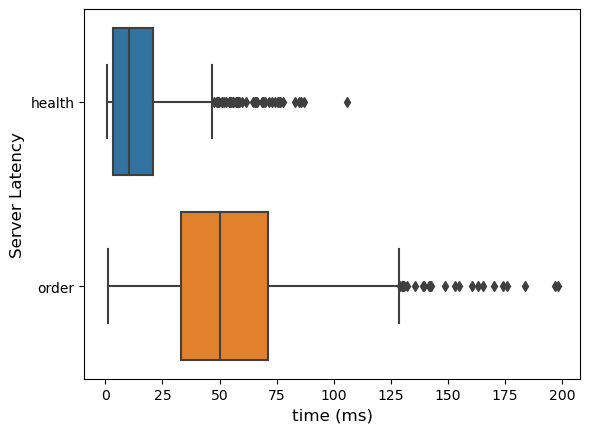

In [22]:
sns.boxplot(data=serialDF1, x="time", y="server")
plt.xlabel('time (ms)', fontsize=12)
plt.ylabel('Server Latency', fontsize=12)
plt.show()

In [23]:
tmpHealth1 = serialDF1[serialDF1['server']=='health'].reset_index(drop=True)
tmpHealth1.head()
print("Median value: {}".format(np.round_(np.median(tmpHealth1['time']),3)))
tmpHealth1.describe()

iterStep        process       time        test  server
0         0  serialization  21.382570  kubernetes  health
1         2  serialization   8.902073  kubernetes  health
2         4  serialization  10.166407  kubernetes  health
3         6  serialization  28.086901  kubernetes  health
4         8  serialization  35.058737  kubernetes  health

Median value: 10.347


iterStep         time
count  1000.000000  1000.000000
mean    999.000000    15.067945
std     577.638872    15.518769
min       0.000000     0.637293
25%     499.500000     3.520608
50%     999.000000    10.346770
75%    1498.500000    20.880282
max    1998.000000   105.911970

In [24]:
tmpOrder1 = serialDF1[serialDF1['server']=='order'].reset_index(drop=True)
tmpOrder1.head()
print("Median value: {}".format(np.round_(np.median(tmpOrder1['time']),3)))
tmpOrder1.describe()

iterStep        process       time        test server
0         1  serialization  77.893257  kubernetes  order
1         3  serialization  32.287359  kubernetes  order
2         5  serialization  50.695181  kubernetes  order
3         7  serialization  15.823841  kubernetes  order
4         9  serialization   5.701065  kubernetes  order

Median value: 50.118


iterStep         time
count  1000.000000  1000.000000
mean   1000.000000    54.573276
std     577.638872    30.096125
min       1.000000     1.102686
25%     500.500000    32.909811
50%    1000.000000    50.117612
75%    1499.500000    71.271777
max    1999.000000   198.122740

# Linkerd Balancer

In [25]:
file2 = pd.read_csv(work_dir+filePaths[2], sep=',')

In [26]:
file2.head()

iterStep               process      time
0         0  health serialization  0.014701
1         1   order serialization  0.019517
2         2  health serialization  0.013300
3         3   order serialization  0.039001
4         4  health serialization  0.001556

In [27]:
datDF2 = file1.copy()
datDF2['iterStep'] = datDF2['iterStep'].astype(int)
datDF2['process'] = datDF2['process'].astype(str)
datDF2['time'] = datDF2['time'].astype(float)
datDF2['test'] = 'linkerd'
datDF2.head()

iterStep               process      time     test
0         0  health serialization  0.021383  linkerd
1         1   order serialization  0.077893  linkerd
2         2  health serialization  0.008902  linkerd
3         3   order serialization  0.032287  linkerd
4         4  health serialization  0.010166  linkerd

In [28]:
tmpLST = []
for i in range(len(datDF2)):
    if 'health' in datDF2['process'][i].lower():
        tmpLST.append("health")
        datDF2.at[i,'process'] = datDF2['process'][i].lower().replace('health ',"")

    if 'order' in datDF2['process'][i].lower():
        tmpLST.append("order")
        datDF2.at[i,'process'] = datDF2['process'][i].lower().replace('order ',"")
    
datDF2['server'] = tmpLST

In [29]:
datDF2.head()

iterStep        process      time     test  server
0         0  serialization  0.021383  linkerd  health
1         1  serialization  0.077893  linkerd   order
2         2  serialization  0.008902  linkerd  health
3         3  serialization  0.032287  linkerd   order
4         4  serialization  0.010166  linkerd  health

In [30]:
serialDF2 = datDF2[datDF2['process']=='serialization'].reset_index(drop=True)

# convert seconds to miliseconds
serialDF2['time'] = serialDF2['time']*1000

serialDF2.head()

iterStep        process       time     test  server
0         0  serialization  21.382570  linkerd  health
1         1  serialization  77.893257  linkerd   order
2         2  serialization   8.902073  linkerd  health
3         3  serialization  32.287359  linkerd   order
4         4  serialization  10.166407  linkerd  health

In [31]:
deserialDF2 = datDF2[datDF2['process']=='deserialization'].reset_index(drop=True)
deserialDF2.head()

Empty DataFrame
Columns: [iterStep, process, time, test, server]
Index: []

<AxesSubplot:xlabel='time', ylabel='server'>

Text(0.5, 0, 'time (ms)')

Text(0, 0.5, 'Server Latency')

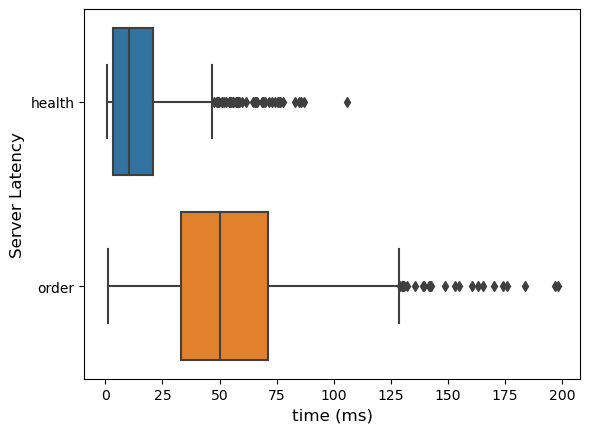

In [32]:
sns.boxplot(data=serialDF2, x="time", y="server")
plt.xlabel('time (ms)', fontsize=12)
plt.ylabel('Server Latency', fontsize=12)
plt.show()

In [33]:
tmpHealth2 = serialDF2[serialDF2['server']=='health'].reset_index(drop=True)
tmpHealth2.head()
print("Median value: {}".format(np.round_(np.median(tmpHealth2['time']),3)))
tmpHealth2.describe()

iterStep        process       time     test  server
0         0  serialization  21.382570  linkerd  health
1         2  serialization   8.902073  linkerd  health
2         4  serialization  10.166407  linkerd  health
3         6  serialization  28.086901  linkerd  health
4         8  serialization  35.058737  linkerd  health

Median value: 10.347


iterStep         time
count  1000.000000  1000.000000
mean    999.000000    15.067945
std     577.638872    15.518769
min       0.000000     0.637293
25%     499.500000     3.520608
50%     999.000000    10.346770
75%    1498.500000    20.880282
max    1998.000000   105.911970

In [34]:
tmpOrder2 = serialDF2[serialDF2['server']=='order'].reset_index(drop=True)
tmpOrder2.head()
print("Median value: {}".format(np.round_(np.median(tmpOrder2['time']),3)))
tmpOrder2.describe()

iterStep        process       time     test server
0         1  serialization  77.893257  linkerd  order
1         3  serialization  32.287359  linkerd  order
2         5  serialization  50.695181  linkerd  order
3         7  serialization  15.823841  linkerd  order
4         9  serialization   5.701065  linkerd  order

Median value: 50.118


iterStep         time
count  1000.000000  1000.000000
mean   1000.000000    54.573276
std     577.638872    30.096125
min       1.000000     1.102686
25%     500.500000    32.909811
50%    1000.000000    50.117612
75%    1499.500000    71.271777
max    1999.000000   198.122740

Health Plots

In [35]:
healthPlots = pd.DataFrame()
healthPlots = pd.concat([healthPlots, tmpHealth])
healthPlots = pd.concat([healthPlots, tmpHealth1])
healthPlots = pd.concat([healthPlots, tmpHealth2])

healthPlots = healthPlots.reset_index(drop=True)

healthPlots.shape
healthPlots.head()

(3000, 5)

iterStep        process        time      test  server
0         0  serialization   16.497612  baseline  health
1         2  serialization   53.431749  baseline  health
2         4  serialization  116.209984  baseline  health
3         6  serialization   43.198824  baseline  health
4         8  serialization   37.658691  baseline  health

<AxesSubplot:xlabel='time', ylabel='test'>

Text(0.5, 0, 'time (ms)')

Text(0, 0.5, 'Health Server Latency')

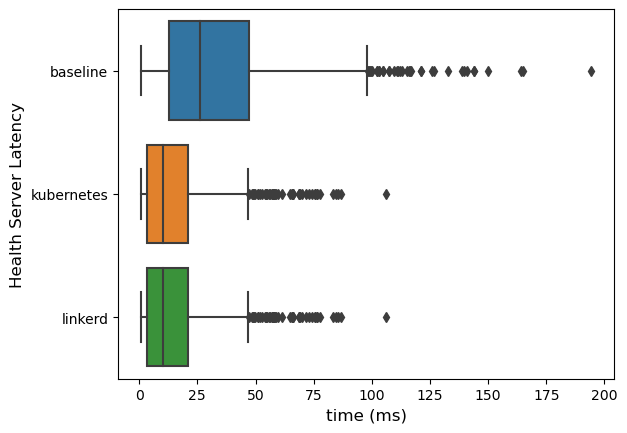

In [36]:
sns.boxplot(data=healthPlots, x="time", y="test")
plt.xlabel('time (ms)', fontsize=12)
plt.ylabel('Health Server Latency', fontsize=12)
plt.show()

In [37]:
orderPlots = pd.DataFrame()
orderPlots = pd.concat([orderPlots, tmpOrder])
orderPlots = pd.concat([orderPlots, tmpOrder1])
orderPlots = pd.concat([orderPlots, tmpOrder2])

orderPlots = orderPlots.reset_index(drop=True)

orderPlots.shape
orderPlots.head()

(3000, 5)

iterStep        process        time      test server
0         1  serialization   50.569296  baseline  order
1         3  serialization   82.337856  baseline  order
2         5  serialization   38.655996  baseline  order
3         7  serialization  182.861805  baseline  order
4         9  serialization   26.018143  baseline  order

<AxesSubplot:xlabel='time', ylabel='test'>

Text(0.5, 0, 'time (ms)')

Text(0, 0.5, 'Order Server Latency')

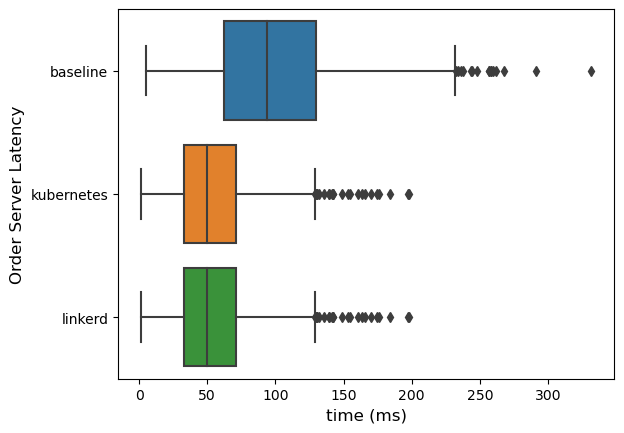

In [38]:
sns.boxplot(data=orderPlots, x="time", y="test")
plt.xlabel('time (ms)', fontsize=12)
plt.ylabel('Order Server Latency', fontsize=12)
plt.show()

# Two Sample t-Test for Health Server

In [39]:
group0 = tmpHealth['time'].values
group1 = tmpHealth1['time'].values
group2 = tmpHealth2['time'].values

Before we perform the test, we need to decide if we’ll assume the two populations have equal variances or not. As a rule of thumb, we can assume the populations have equal variances if the ratio of the larger sample variance to the smaller sample variance is less than 4:1.

In [40]:
tmp_x1 = group0
tmp_x2 = group1

#find variance for each group
print("X1: {} | X2: {}\n".format(np.var(tmp_x1), np.var(tmp_x2)))

if np.var(tmp_x1)>=np.var(tmp_x2):
    print("X1 is larger")
    print(np.var(tmp_x1)/np.var(tmp_x2))
else:
    print("X2 is larger")
    print(np.var(tmp_x2)/np.var(tmp_x1))

X1: 759.8528394737876 | X2: 240.5913538282402

X1 is larger
3.158271597807508


In [41]:
tmp_x1 = group0
tmp_x2 = group2

#find variance for each group
print("X1: {} | X2: {}\n".format(np.var(tmp_x1), np.var(tmp_x2)))

if np.var(tmp_x1)>=np.var(tmp_x2):
    print("X1 is larger")
    print(np.var(tmp_x1)/np.var(tmp_x2))
else:
    print("X2 is larger")
    print(np.var(tmp_x2)/np.var(tmp_x1))

X1: 759.8528394737876 | X2: 240.5913538282402

X1 is larger
3.158271597807508


In [42]:
tmp_x1 = group1
tmp_x2 = group2

#find variance for each group
print("X1: {} | X2: {}\n".format(np.var(tmp_x1), np.var(tmp_x2)))

if np.var(tmp_x1)>=np.var(tmp_x2):
    print("X1 is larger")
    print(np.var(tmp_x1)/np.var(tmp_x2))
else:
    print("X2 is larger")
    print(np.var(tmp_x2)/np.var(tmp_x1))

X1: 240.5913538282402 | X2: 240.5913538282402

X1 is larger
1.0


Thus, we can proceed to perform the two sample t-test with equal variances:

The two hypotheses for this particular two sample t-test are as follows:

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)

In [43]:
tmp_x1 = group0
tmp_x2 = group1

#perform two sample t-test with equal variances
statVal, pvalue = stats.ttest_ind(a=tmp_x1, b=tmp_x2, equal_var=True)

In [44]:
print(statVal)

18.23221990894745


In [45]:
print(pvalue)

7.988026891027431e-69


Because the p-value of our test is less than alpha = 0.05, we reject the null hypothesis of the test. We do have sufficient evidence to say that the mean between the two populations is different.

In [46]:
tmp_x1 = group0
tmp_x2 = group2

#perform two sample t-test with equal variances
statVal, pvalue = stats.ttest_ind(a=tmp_x1, b=tmp_x2, equal_var=True)

In [47]:
print(statVal)

18.23221990894745


In [48]:
print(pvalue)

7.988026891027431e-69


Because the p-value of our test is less than alpha = 0.05, we reject the null hypothesis of the test. We do have sufficient evidence to say that the mean between the two populations is different.

In [49]:
tmp_x1 = group1
tmp_x2 = group2

#perform two sample t-test with equal variances
statVal, pvalue = stats.ttest_ind(a=tmp_x1, b=tmp_x2, equal_var=True)

In [50]:
print(statVal)

0.0


In [51]:
print(pvalue)

1.0


Because the p-value of our test is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. We do not have sufficient evidence to say that the mean between the two populations is different.